 # **Donors for Charity Prediction**

## **1. Business Objective**

Based on the income data, the aim of the project is to predict donors for charity.

## **2. Data Collection**

The dataset was obtained from kaggle. Link: https://www.kaggle.com/wenruliu/adult-income-dataset




In [1]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGlEGB4v3rMzOngm2ORE3a4U63C78O1ycD3UnbdqdNi_XjZzYYxBeQ
Mounted at /content/drive


In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Setting up some parameters for the workbook

plt.style.use('classic')
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [4]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

## **3. Data Preparation/Preprocessing**

We will start with loading and familiarizing with the dataset so that we can prepare the data for Machine Learning (ML) modeling.

In [5]:
# Loading the dataset

file_path = "/content/drive/My Drive/Colab Datasets/Donors for Charity Prediction/adult.csv"
income_data = pd.read_csv(file_path)

In [6]:
# Checking the features and no. of records in the dataset.

print("The number of records are : ", income_data.shape[0])
print("The number of features are : ", income_data.shape[1])
print("The list of features is : ", income_data.columns)
income_data.head()

The number of records are :  48842
The number of features are :  15
The list of features is :  Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


##### There are close to 49K records and 15 features in the dataset

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.

In [7]:
# Checking the information about the dataset

print("The features and its count is as follows:\n", income_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
The features and its count is as follows:
 None


##### There are few categorical features in the dataset that we need to encode.

In [8]:
# Checking the percentage of missing values

print("The features and its count is as follows:\n", income_data.isnull().mean() * 100)

The features and its count is as follows:
 age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64


In [9]:
# Checking for null values which is present in "?" form

features_with_missing_values = []
for feat in income_data.columns:
    if "?" in income_data[feat].values:
        features_with_missing_values.append(feat)

print("The features with missing values are: ", features_with_missing_values)

The features with missing values are:  ['workclass', 'occupation', 'native-country']


##### Features "workclass", "occupation", "native-country" contains nan values.

#### **3.1.1 Handling missing values**

In [10]:
# Checking the "workclass" feature

income_data["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
# Checking the "occupation" feature

income_data["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [12]:
# Checking the "native-country" feature

income_data["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [13]:
# Imputing the missing values

# Creating a new label for the missing workclass as a high proportion of values are missing
income_data["workclass"] = income_data["workclass"].replace("?", "Others")

# Creating a new label for the missing occupation as a high proportion of values are missing
income_data["occupation"] = income_data["occupation"].replace("?", "Others")

# Creating a new label for the missing occupation as a high proportion of values are missing
income_data["native-country"] = income_data["native-country"].replace("?", "ROI")

#### **3.2 Exploratory Data Analysis**

After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

#### **3.2.1 Univariate Analysis**

We will start with exploring the inidividual features of the dataset, and try to identify the outliers, rare values, high cardinality features along with their destribution

Text(0.5, 0, ' ')

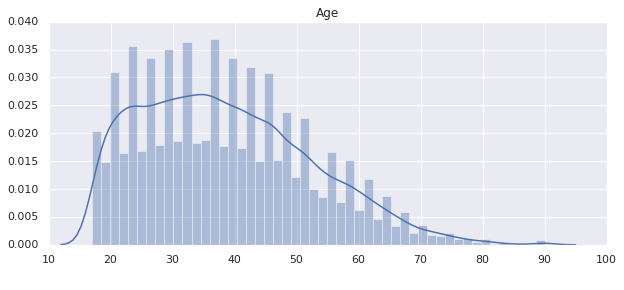

In [14]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
fig, ax1 = plot_objects

#sns.countplot(x = "age", data = income_data, ax=ax1)
sns.distplot(income_data["age"], ax=ax1)
ax1.set_title("Age")
ax1.set_xlabel(" ")

##### The distribution looks highly varied with few outlier like values towards the right. We can look to drop them to prevent overfitting.

In [15]:
print("The count of people greater than age {} are : {}".format(70, len(income_data[income_data["age"] > 75])))

The count of people greater than age 70 are : 373


In [16]:
# Checking the 99th quantile information

quantile_age = income_data["age"].quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 4)
for i in qValues:
    print("{}th percentile value of age is {}".format(((i*100)), quantile_age[i]))

99.1th percentile value of age is 75.0
99.2th percentile value of age is 75.0
99.3th percentile value of age is 76.0
99.4th percentile value of age is 77.0
99.5th percentile value of age is 78.0
99.6th percentile value of age is 79.0
99.7th percentile value of age is 81.0
99.8th percentile value of age is 82.0
99.9th percentile value of age is 90.0
100.0th percentile value of age is 90.0


In [17]:
# Dropping the values less than 99th percentile

cleaned_data = income_data[income_data["age"] <= 75]

Text(0.5, 0, ' ')

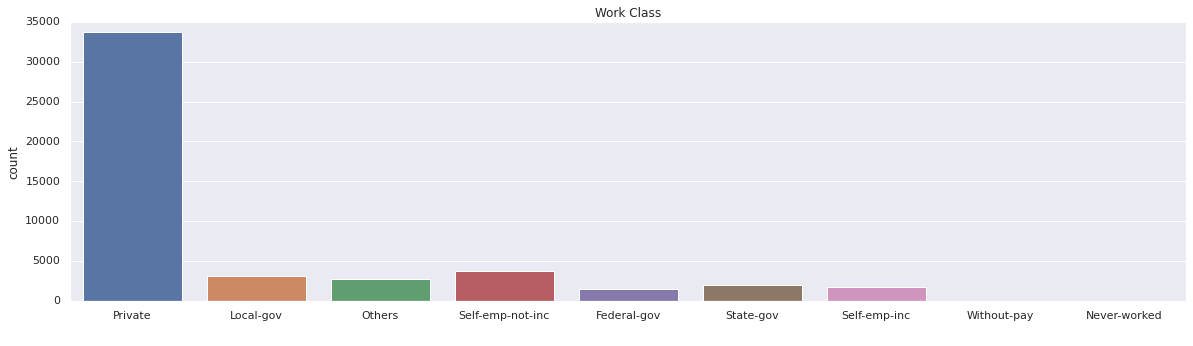

In [18]:
# Visualizing the "workclass" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(x = "workclass", data = cleaned_data, ax=ax1)
ax1.set_title("Work Class")
ax1.set_xlabel(" ")

##### Most of the population are in the "Private" work class.

Text(0.5, 0, ' ')

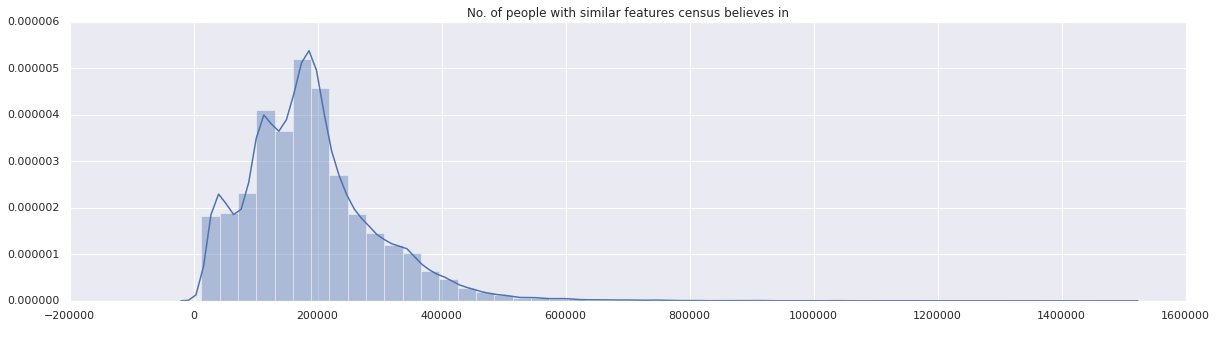

In [19]:
# Visualizing the "fnlwgt" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(cleaned_data["fnlwgt"], ax=ax1)
ax1.set_title("No. of people with similar features census believes in")
ax1.set_xlabel(" ")

In [20]:
cleaned_data["fnlwgt"].describe()

count    4.846900e+04
mean     1.898884e+05
std      1.057115e+05
min      1.228500e+04
25%      1.176060e+05
50%      1.783560e+05
75%      2.378790e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

##### This feature "fnlwgt" is highly right skewed.

Text(0.5, 0, ' ')

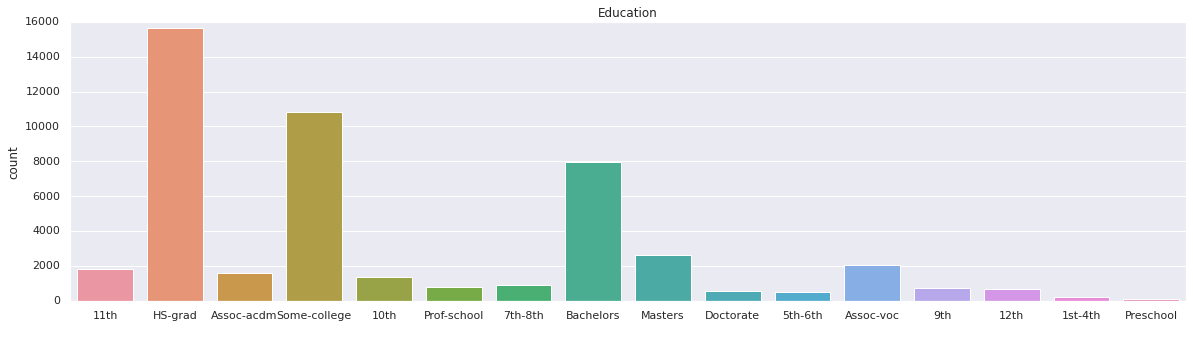

In [21]:
# Visualizing the "education" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(x = "education", data = cleaned_data, ax=ax1)
ax1.set_title("Education")
ax1.set_xlabel(" ")

##### Most of population are "HS-grad" but looks like we can categorize them better. 

In [22]:
cleaned_data["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [23]:
education_dict = {'11th' : "High School", 'HS-grad' : "High School Graduate", 'Assoc-acdm' : "Assoc Acdm", 'Some-college' : "Bachelors", '10th' : "High School",
       'Prof-school' : "Prof School" , '7th-8th' : "Middle School", 'Bachelors' : "Bachelors", 'Masters' : "Masters", 'Doctorate' : "Doctorate",
       '5th-6th': "Middle School", 'Assoc-voc' : "Assoc Voc", '9th' : "High School", '12th' : "High School Graduate", '1st-4th' : "Primary School", 'Preschool' : "Primary School"}

In [24]:
cleaned_data["education"] = cleaned_data["education"].map(education_dict)

Text(0.5, 0, ' ')

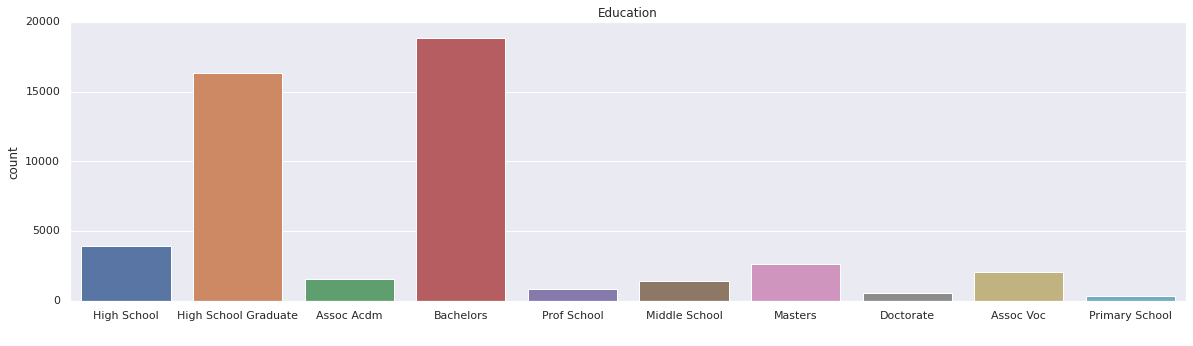

In [25]:
# Visualizing the "education" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(x = "education", data = cleaned_data, ax=ax1)
ax1.set_title("Education")
ax1.set_xlabel(" ")

In [26]:
# "educational-num" is the orderinal feature for "education" feature and can relabelled during the encoding, so we can drop it for now.

cleaned_data["educational-num"].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

Text(0.5, 0, ' ')

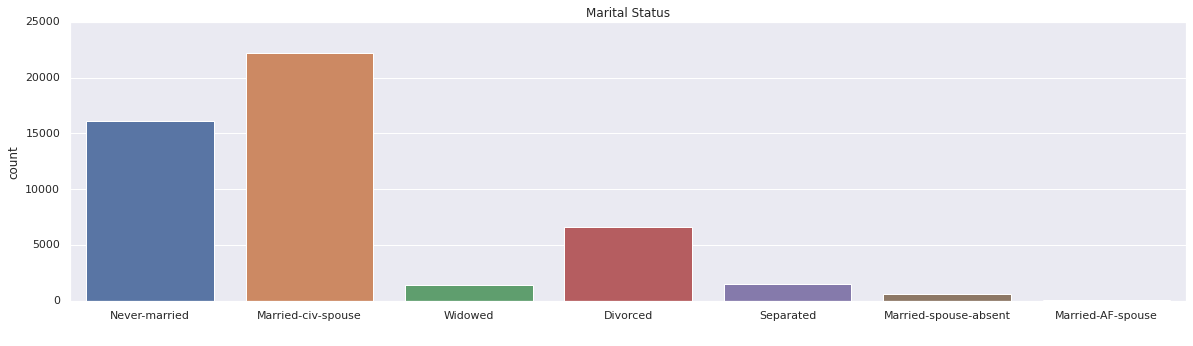

In [27]:
# Visualizing the "marital-status" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(x = "marital-status", data = cleaned_data, ax=ax1)
ax1.set_title("Marital Status")
ax1.set_xlabel(" ")

##### Most of the population is "married".

Text(0.5, 0, ' ')

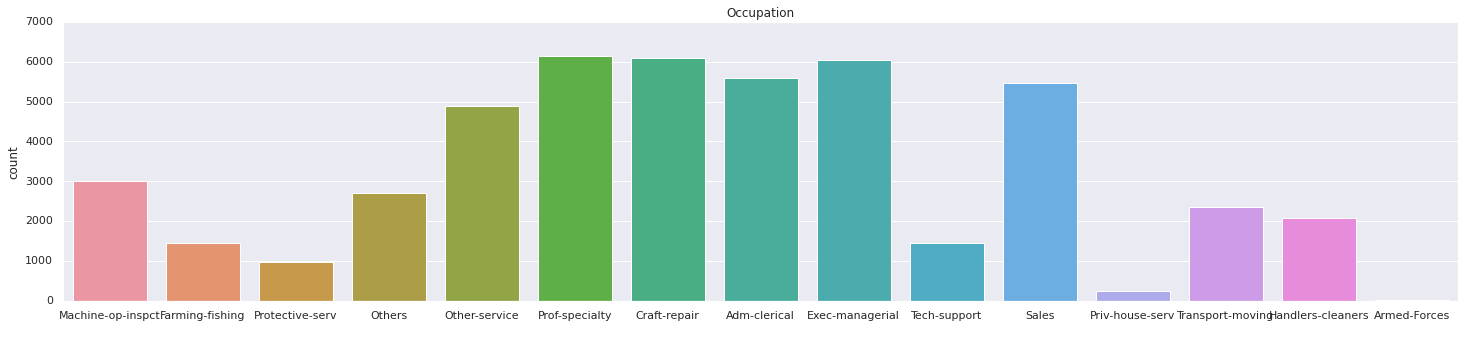

In [28]:
# Visualizing the "occupation" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
fig, ax1 = plot_objects

sns.countplot(x = "occupation", data = cleaned_data, ax=ax1)
ax1.set_title("Occupation")
ax1.set_xlabel(" ")

##### There are around 15 different occupations available in the dataset among which some of them are highly skewed.

Text(0.5, 0, ' ')

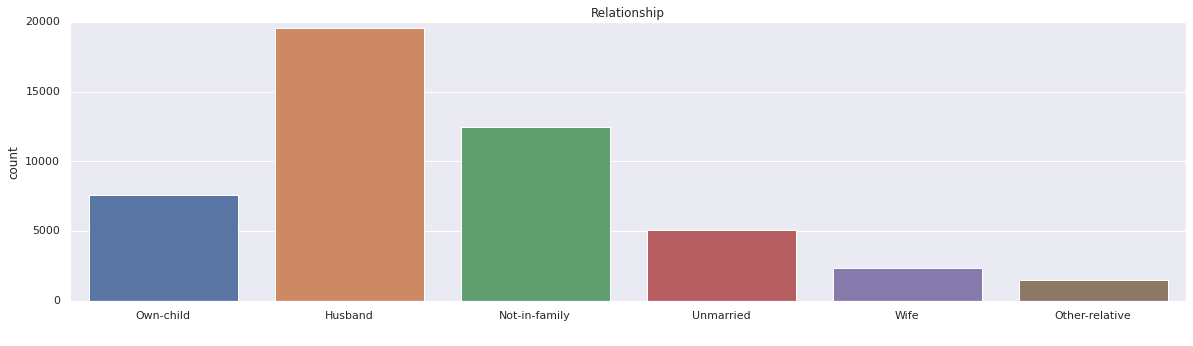

In [29]:
# Visualizing the "relationship" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(x = "relationship", data = cleaned_data, ax=ax1)
ax1.set_title("Relationship")
ax1.set_xlabel(" ")

Text(0.5, 0, ' ')

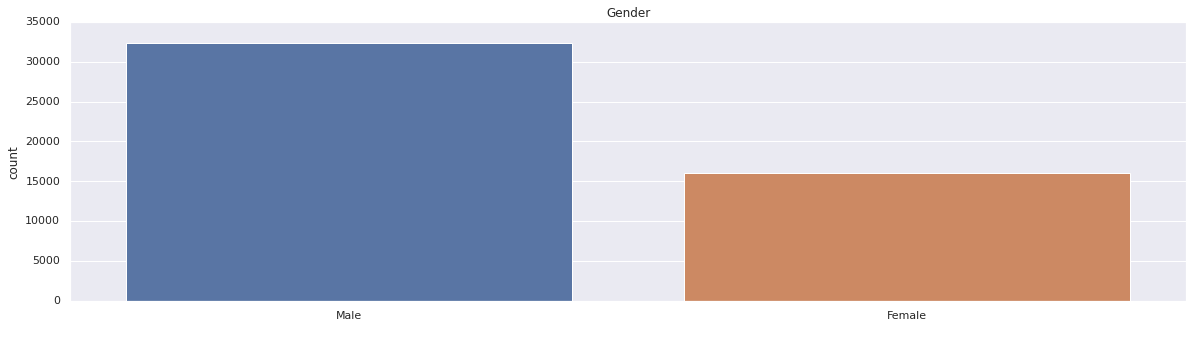

In [30]:
# Visualizing the "relationship" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(x = "gender", data = cleaned_data, ax=ax1)
ax1.set_title("Gender")
ax1.set_xlabel(" ")

##### Most of the population is "Male" and thereby the relationship is seen to be "husbands".

Text(0.5, 0, ' ')

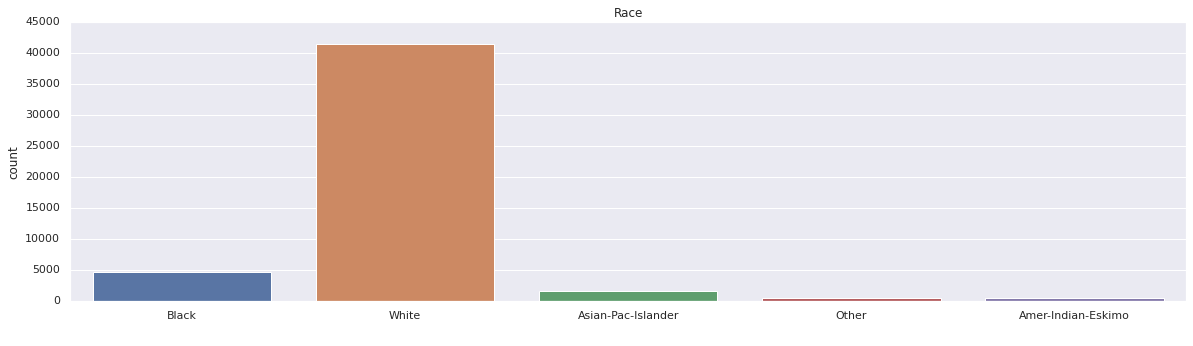

In [31]:
# Visualizing the "race" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(x = "race", data = cleaned_data, ax=ax1)
ax1.set_title("Race")
ax1.set_xlabel(" ")

##### Most of the population are "white".

Text(0.5, 0, ' ')

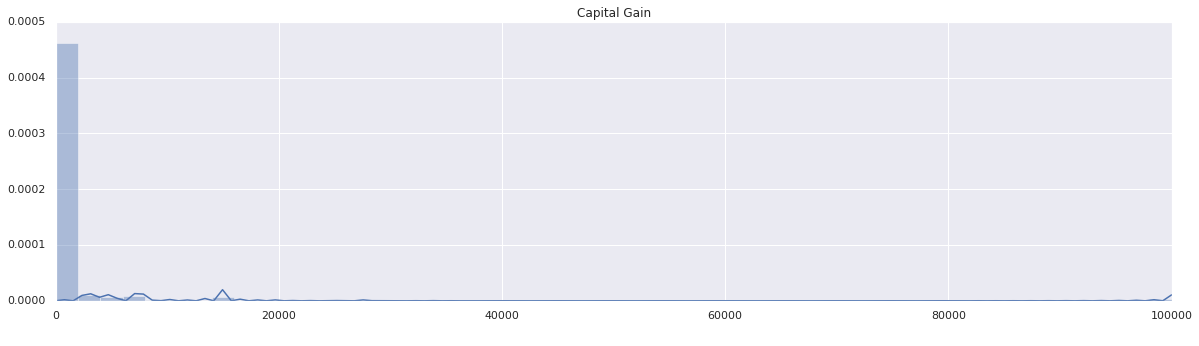

In [32]:
# Visualizing the "capital-gain" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(cleaned_data["capital-gain"], ax=ax1)
ax1.set_title("Capital Gain")
ax1.set_xlabel(" ")

Text(0.5, 0, ' ')

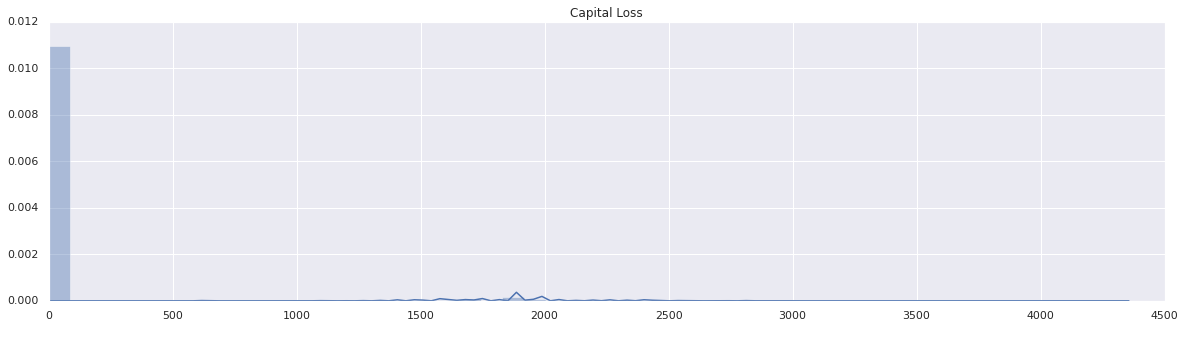

In [33]:
# Visualizing the "capital-loss" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(cleaned_data["capital-loss"], ax=ax1)
ax1.set_title("Capital Loss")
ax1.set_xlabel(" ")

Text(0.5, 0, ' ')

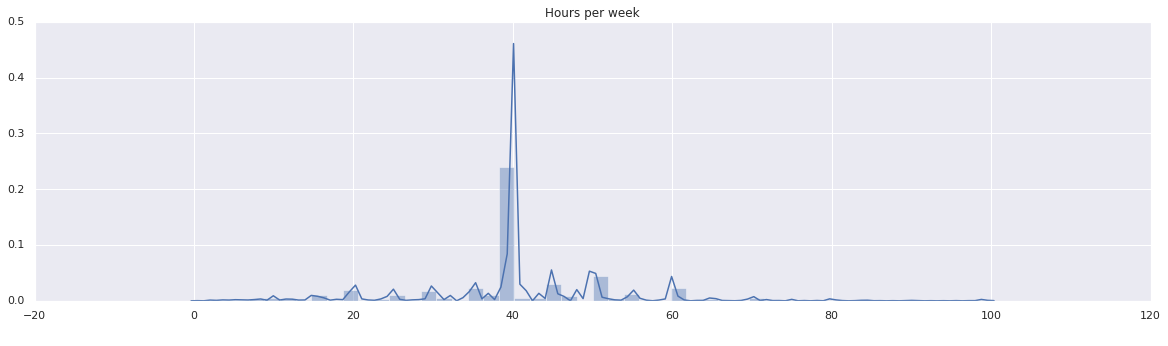

In [34]:
# Visualizing the "hours-per-week" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(cleaned_data["hours-per-week"], ax=ax1)
ax1.set_title("Hours per week")
ax1.set_xlabel(" ")

##### Most the population works around 40-50hrs per week.





Text(0.5, 0, ' ')

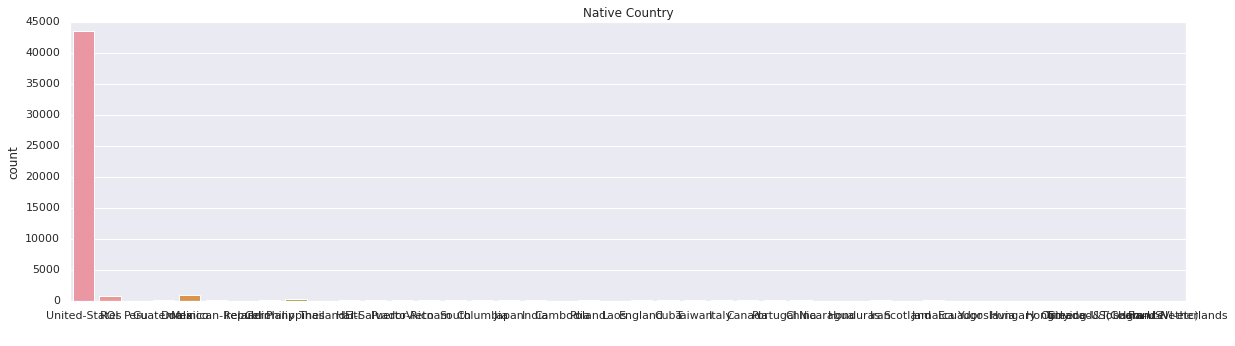

In [35]:
# Visualizing the "native-country" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(x = "native-country", data = cleaned_data, ax=ax1)
ax1.set_title("Native Country")
ax1.set_xlabel(" ")

In [36]:
cleaned_data["native-country"].value_counts()

United-States                 43494
Mexico                          950
ROI                             851
Philippines                     293
Germany                         206
Puerto-Rico                     183
Canada                          178
El-Salvador                     154
India                           151
Cuba                            136
England                         124
China                           121
South                           112
Jamaica                         106
Italy                           104
Dominican-Republic              102
Japan                            92
Guatemala                        88
Vietnam                          86
Columbia                         85
Poland                           84
Haiti                            75
Portugal                         65
Taiwan                           65
Iran                             59
Nicaragua                        48
Greece                           48
Peru                        

##### Most of the population are native Americans.

Text(0.5, 0, ' ')

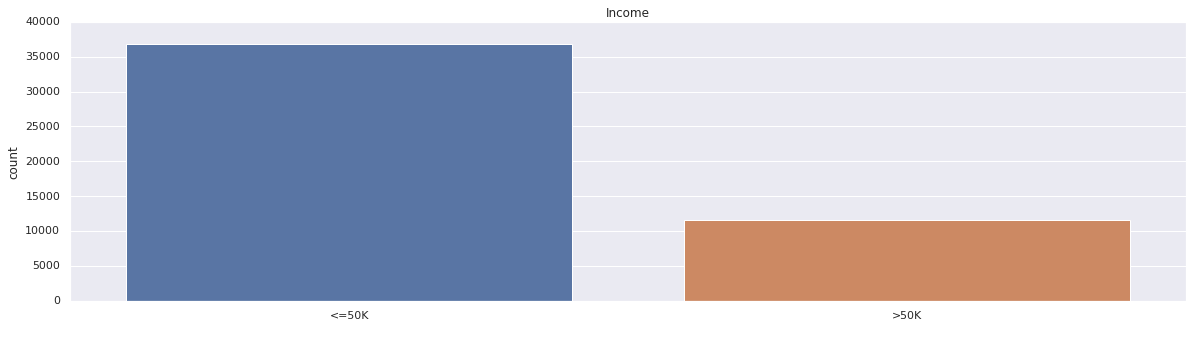

In [37]:
# Visualizing the "income" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(x = "income", data = cleaned_data, ax=ax1)
ax1.set_title("Income")
ax1.set_xlabel(" ")

##### Most of the population income is less than 50K. The dataset looks bit imbalanced so we might have to tackle that.

In [38]:
# Dropping the feature that are not needed anymore

cleaned_data = cleaned_data.drop(labels=["educational-num"], axis=1)

#### **3.2.2 Bi-variate Analysis**

We will try to analyze multiple feature to extract insights, patterns and relationships from the data.

Text(0.5, 0, ' ')

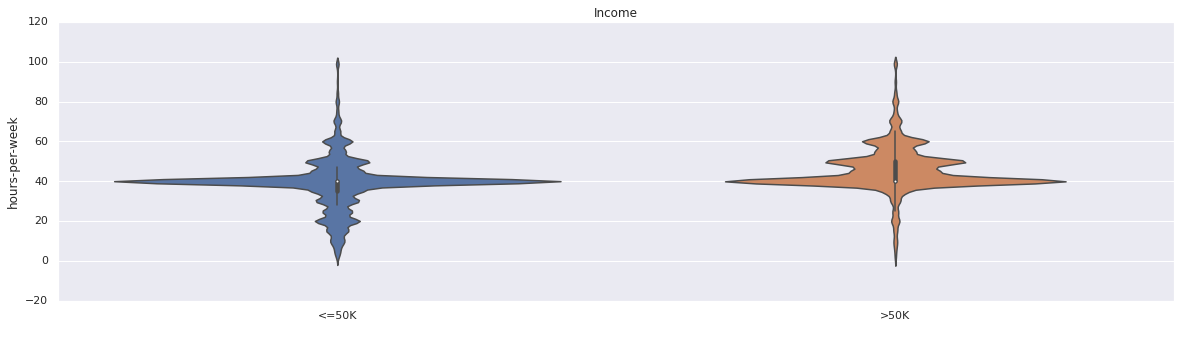

In [39]:
# Visualizing the "income" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.violinplot(x = "income", y = "hours-per-week" , data = cleaned_data, ax=ax1)
ax1.set_title("Income")
ax1.set_xlabel(" ")

##### Observations:

1.   Both the income groups tend to work similar number of hours per week.



Text(0.5, 0, ' ')

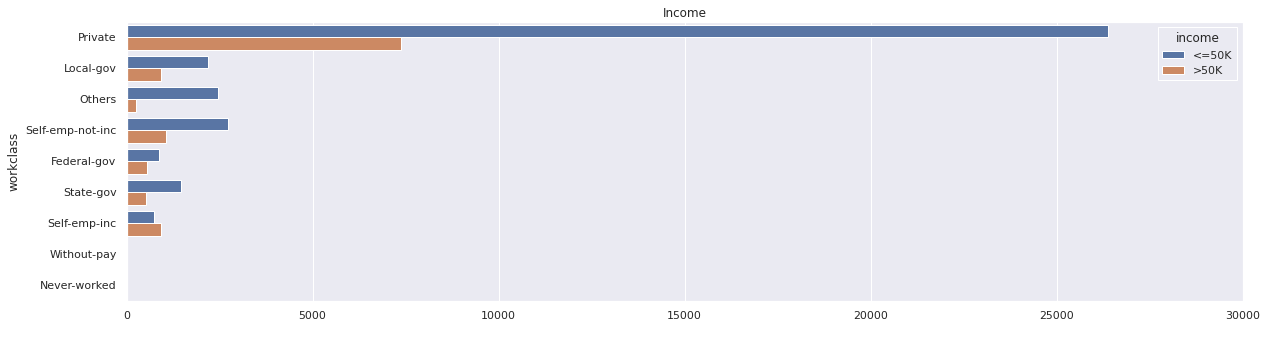

In [40]:
# Visualizing the "income" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(hue = "income", y = "workclass" , data = cleaned_data, ax=ax1)
ax1.set_title("Income")
ax1.set_xlabel(" ")

##### Observations:

1.   "Private" workclass tend to have the highest number of potential donors
2.   Few of the labels can be grouped together to reduce the cardinality of the feature



In [41]:
# Merging couple of workclass labels with "Others"

cleaned_data["workclass"] = cleaned_data["workclass"].replace("Without-pay", "Others")
cleaned_data["workclass"] = cleaned_data["workclass"].replace("Never-worked", "Others")

Text(0.5, 0, ' ')

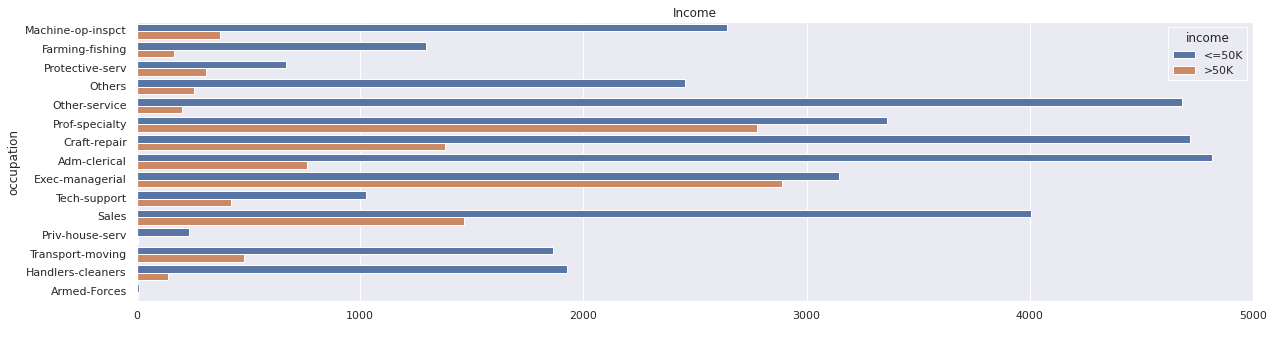

In [42]:
# Visualizing the "income" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(hue = "income", y = "occupation" , data = cleaned_data, ax=ax1)
ax1.set_title("Income")
ax1.set_xlabel(" ")

##### Observations:

1.   "Prof-speciality" and "Exec-managerial" are the two occupations with highest numbers of potential donors.
2.   Few of the occupations have very low potential donors.



Text(0.5, 0, ' ')

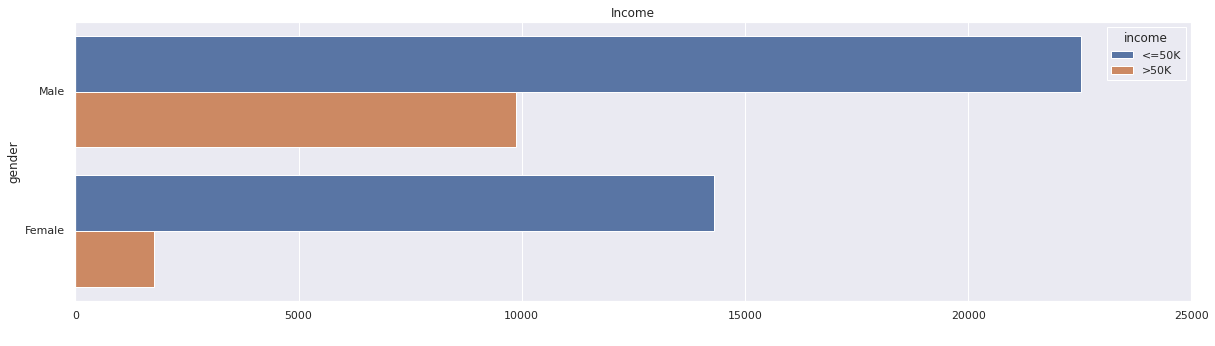

In [43]:
# Visualizing the "income" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(hue = "income", y = "gender" , data = cleaned_data, ax=ax1)
ax1.set_title("Income")
ax1.set_xlabel(" ")

##### Observations:
1.   "Male" population tend be higher than female for potential donors 



Text(0.5, 0, ' ')

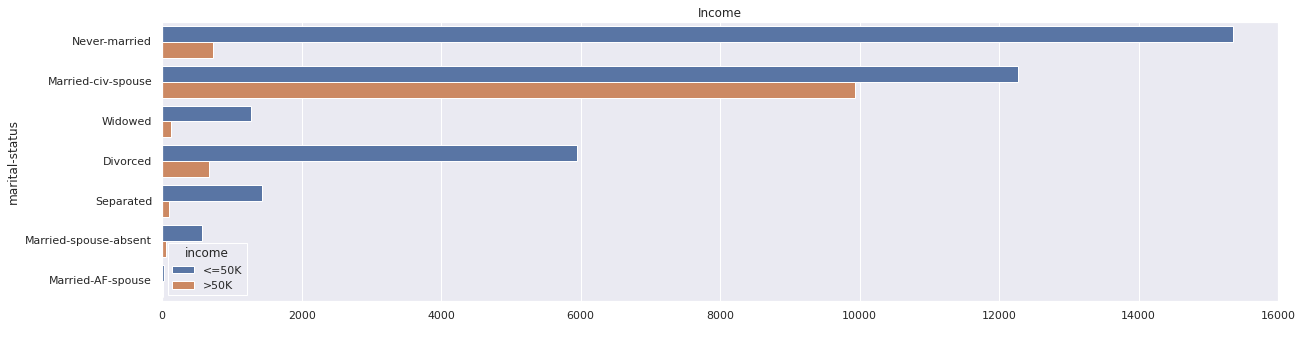

In [44]:
# Visualizing the "income" feature

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.countplot(hue = "income", y = "marital-status" , data = cleaned_data, ax=ax1)
ax1.set_title("Income")
ax1.set_xlabel(" ")

##### Observations:
1.   "Married" population seems to be the largest donors.

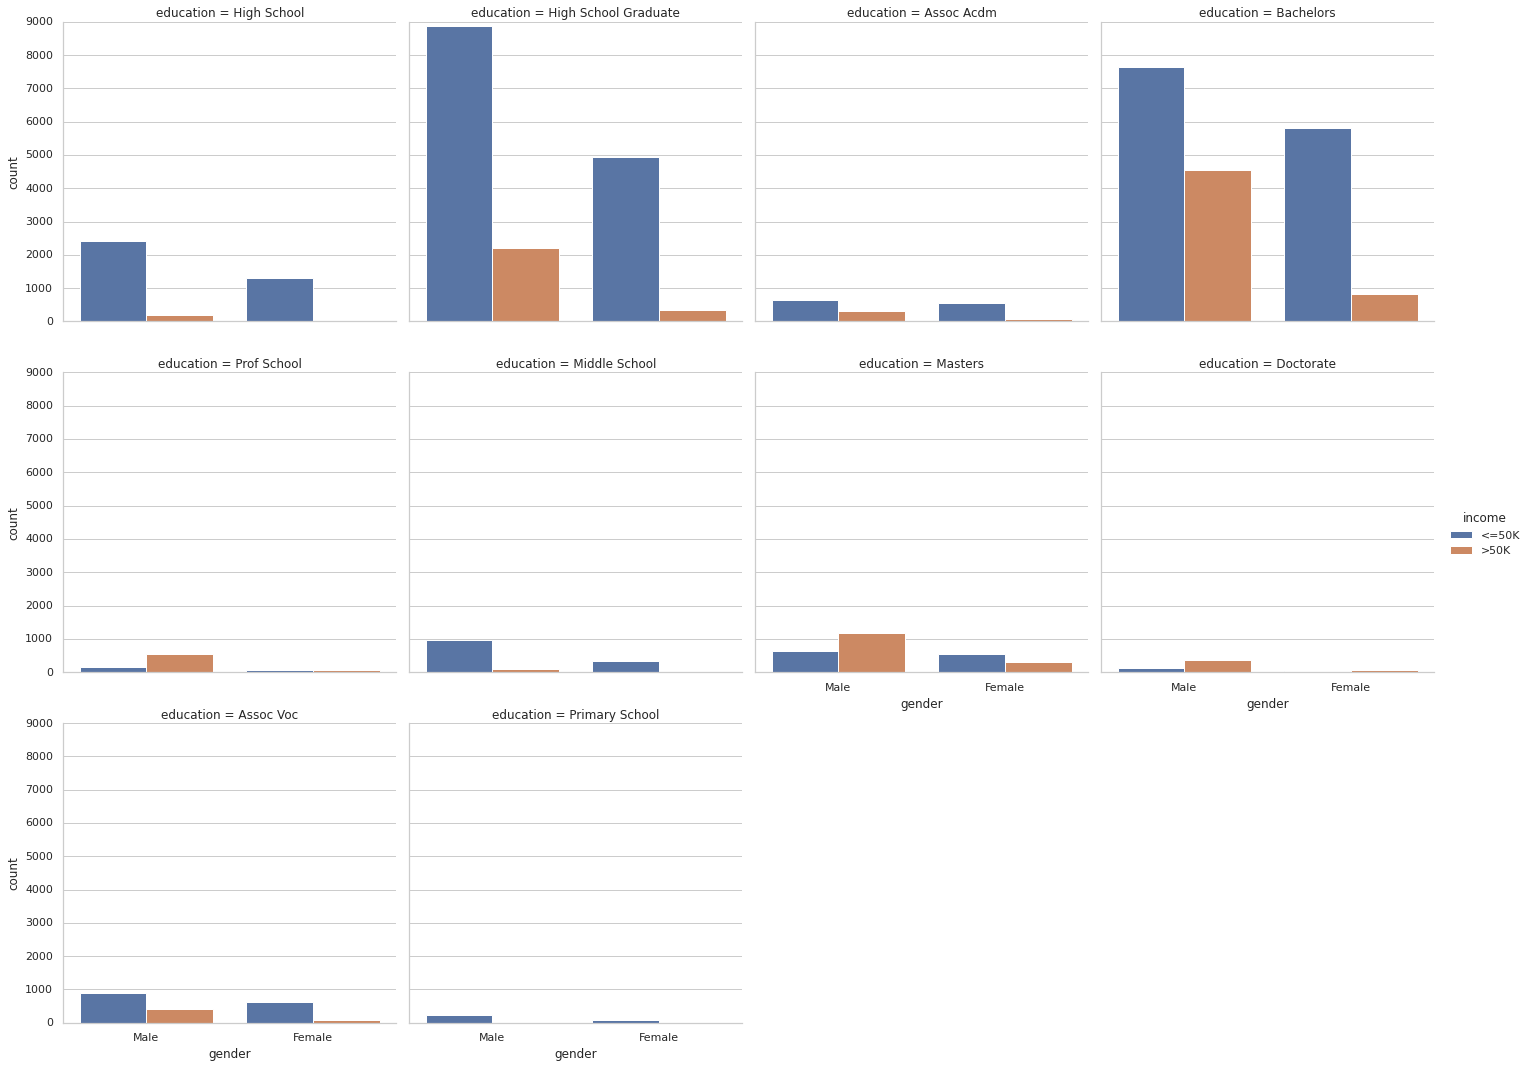

In [45]:
sns.set(style="whitegrid", color_codes=True)
sns.factorplot(x="gender", col='education', data=cleaned_data, hue='income', kind="count", col_wrap=4);

##### Observations:
1. "High School Graduate" and "Bachelors" comprise a large portion of the population and thereby, the donors.

### **3.3 Feature Extraction**

We can now extract some meaningful features and drop the unimportant ones. We can look to reduce cardinality as well.

In [46]:
# changing the absolute values to categorical ones

cleaned_data["capital-gain"] = np.where(cleaned_data["capital-gain"] > 0, 1, 0)
cleaned_data["capital-loss"] = np.where(cleaned_data["capital-loss"] > 0, 1, 0)

In [47]:
cleaned_data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,High School,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,High School Graduate,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc Acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Bachelors,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1,0,40,United-States,>50K
4,18,Others,103497,Bachelors,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K


In [48]:
# Since most of the data records are from US, we can club the rest of them into single one.

def change_native_country(x):
    if x == "United-States":
        return x
    else:
        return "Row"

cleaned_data["native-country"] = cleaned_data["native-country"].apply(change_native_country)

In [49]:
# Since most of the data records are from US, we can club the rest of them into single one.

def modify_race_feature(x):
    if x == "White":
        return x
    else:
        return "Others"

cleaned_data["race"] = cleaned_data["race"].apply(modify_race_feature)

In [50]:
# Dropping "fnlwgt" feature as it will not add  any use to prediction

cleaned_data = cleaned_data.drop(["fnlwgt"], axis=1)

In [51]:
cleaned_data.reset_index(inplace=True)
cleaned_data.drop(["index"], axis=1, inplace=True)

### **3.4 Handling Categorical Features**

Encoding the categorical features to be useful for ML algos.

In [52]:
num_features = ["age", "capital-gain", "capital-loss", "hours-per-week"]
cat_features = ["workclass", "education", "occupation", "marital-status", "relationship", "race", "gender", "native-country", "income"]

In [53]:
cleaned_data["education"].unique()

array(['High School', 'High School Graduate', 'Assoc Acdm', 'Bachelors',
       'Prof School', 'Middle School', 'Masters', 'Doctorate',
       'Assoc Voc', 'Primary School'], dtype=object)

In [54]:
# Ordinal Encoding of feature "education"

education_encoding = {'High School' : 3, 'High School Graduate' : 4, 'Assoc Acdm':6, 'Bachelors': 8,
                      'Prof School' : 5, 'Middle School' : 2, 'Masters' : 9, 'Doctorate' : 10, 'Assoc Voc':7, 'Primary School' : 1}

In [55]:
education_le = cleaned_data[["education"]]
education_le["education"] = cleaned_data["education"].map(education_encoding)

In [56]:
le1 = LabelEncoder()
workclass = le1.fit_transform(cleaned_data["workclass"])

le2 = LabelEncoder()
occupation = le2.fit_transform(cleaned_data["occupation"])

le3 = LabelEncoder()
marital_status = le3.fit_transform(cleaned_data["marital-status"])

le4 = LabelEncoder()
relationship = le4.fit_transform(cleaned_data["relationship"])

le5 = LabelEncoder()
race = le5.fit_transform(cleaned_data["race"])

le6 = LabelEncoder()
gender = le6.fit_transform(cleaned_data["gender"])

le7 = LabelEncoder()
native_country = le7.fit_transform(cleaned_data["native-country"])

le8 = LabelEncoder()
income = le8.fit_transform(cleaned_data["income"])

In [57]:
ohe1 = OneHotEncoder()
workclass_ohe = ohe1.fit_transform(workclass.reshape(-1,1))
workclass_ohe = pd.DataFrame(workclass_ohe.toarray(), columns = [x +"_Workclass" for x in le1.classes_])

ohe2 = OneHotEncoder()
occupation_ohe = ohe2.fit_transform(occupation.reshape(-1,1))
occupation_ohe = pd.DataFrame(occupation_ohe.toarray(), columns = [x +"_Occupation" for x in le2.classes_])

ohe3 = OneHotEncoder()
marital_status_ohe = ohe3.fit_transform(marital_status.reshape(-1,1))
marital_status_ohe = pd.DataFrame(marital_status_ohe.toarray(), columns = [x +"_Marital_Status" for x in le3.classes_])

ohe4 = OneHotEncoder()
relationship_ohe = ohe4.fit_transform(relationship.reshape(-1,1))
relationship_ohe = pd.DataFrame(relationship_ohe.toarray(), columns = [x +"_Relationship" for x in le4.classes_])

In [58]:
data_for_tree = pd.concat([cleaned_data[num_features], workclass_ohe, education_le,occupation_ohe, marital_status_ohe, relationship_ohe, pd.DataFrame(race, columns=["race"]),
                           pd.DataFrame(gender, columns=["gender"]), pd.DataFrame(native_country, columns=["native-country"]), pd.DataFrame(income, columns=["Donor"])], axis = 1)

In [59]:
data_for_tree

,age,capital-gain,capital-loss,hours-per-week,Federal-gov_Workclass,Local-gov_Workclass,Others_Workclass,Private_Workclass,Self-emp-inc_Workclass,Self-emp-not-inc_Workclass,State-gov_Workclass,education,Adm-clerical_Occupation,Armed-Forces_Occupation,Craft-repair_Occupation,Exec-managerial_Occupation,Farming-fishing_Occupation,Handlers-cleaners_Occupation,Machine-op-inspct_Occupation,Other-service_Occupation,Others_Occupation,Priv-house-serv_Occupation,Prof-specialty_Occupation,Protective-serv_Occupation,Sales_Occupation,Tech-support_Occupation,Transport-moving_Occupation,Divorced_Marital_Status,Married-AF-spouse_Marital_Status,Married-civ-spouse_Marital_Status,Married-spouse-absent_Marital_Status,Never-married_Marital_Status,Separated_Marital_Status,Widowed_Marital_Status,Husband_Relationship,Not-in-family_Relationship,Other-relative_Relationship,Own-child_Relationship,Unmarried_Relationship,Wife_Relationship,race,gender,native-country,Donor
0,25,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,0
1,38,0,0,50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
2,28,0,0,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
3,44,1,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1
4,18,0,0,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48464,27,0,0,38,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0
48465,40,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
48466,58,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
48467,22,0,0,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,0


## **4. Model Building**

After the data preparation we can now proceed to build models for donor prediction.

### **4.1 Train/test Splitting**

Splitting the dataset into dependent and independent features and creating train/test splits.

In [60]:
X_tree = data_for_tree.drop(["Donor"], axis=1)
y_tree = data_for_tree[["Donor"]]

In [61]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree.values, y_tree.values, test_size=0.2, random_state=42)
print('X_train.shape: ', X_tree_train.shape, '\tX_test.shape: ', X_tree_test.shape, '\nY_train.shape: ', y_tree_train.shape, '\tY_test.shape: ', y_tree_test.shape)

X_train.shape:  (38775, 43) 	X_test.shape:  (9694, 43) 
Y_train.shape:  (38775, 1) 	Y_test.shape:  (9694, 1)


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [63]:
def fcnPrintErrorMetrics(y_test, y_pred):
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('Recall Score:', metrics.recall_score(y_test, y_pred))
    print('F1-Score:', f1_score(y_test, y_pred))


    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d")
    plt.title("Confusion Matrix")

### **4.2 Model Fitting**

Testing out various models to pick the best for the given dataset.

Accuracy: 0.8415514751392614
Precision Score: 0.7082268778742974
Recall Score: 0.5895363675031902
F1-Score: 0.6434540389972145


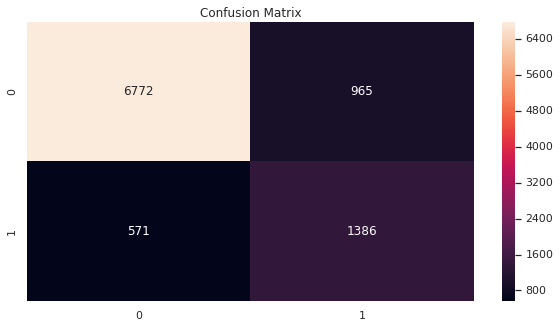

In [64]:
# Logistic Regression'

log_reg = LogisticRegression(penalty='l2')
log_reg.fit(X_tree_train, y_tree_train)
y_pred1 = log_reg.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred1)

Accuracy: 0.827109552300392
Precision Score: 0.7076923076923077
Recall Score: 0.48915355168013613
F1-Score: 0.5784708249496983


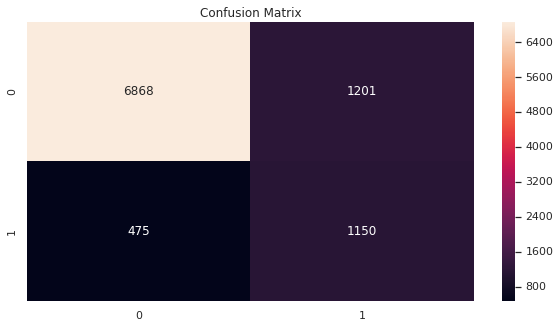

In [65]:
svc = SVC()
svc.fit(X_tree_train, y_tree_train)
y_pred2 = svc.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred2)

Accuracy: 0.7962657313802352
Precision Score: 0.58348134991119
Recall Score: 0.5589111016588686
F1-Score: 0.5709320008689984


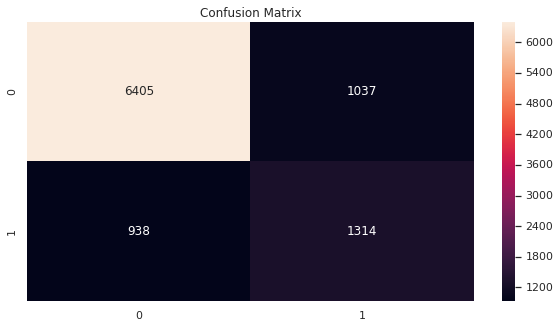

In [66]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_tree_train, y_tree_train)
y_pred3 = dt_clf.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred3)

Accuracy: 0.8279348050340417
Precision Score: 0.661160924964606
Recall Score: 0.5959166312207571
F1-Score: 0.6268456375838926


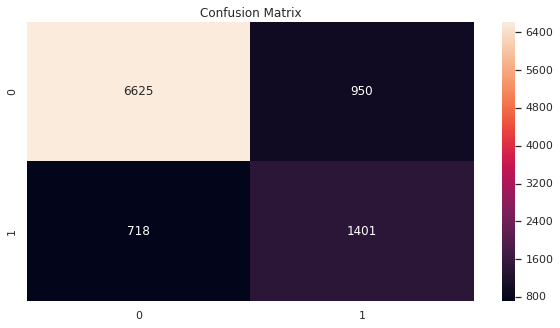

In [67]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_tree_train, y_tree_train)
y_pred4 = rf_clf.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred4)

Accuracy: 0.849185062925521
Precision Score: 0.7273657289002557
Recall Score: 0.604849000425351
F1-Score: 0.6604737575476081


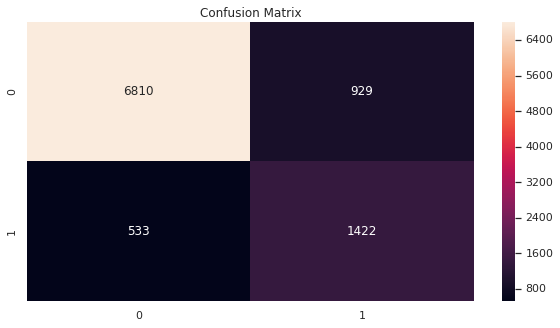

In [68]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_tree_train, y_tree_train)
y_pred5 = ab_clf.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred5)

Accuracy: 0.8490819063338148
Precision Score: 0.7317327766179541
Recall Score: 0.5963419821352616
F1-Score: 0.6571361612374033


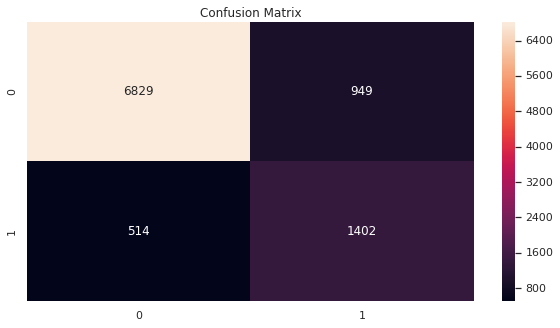

In [69]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_tree_train, y_tree_train)
y_pred6 = gb_clf.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred6)

Accuracy: 0.8494945327006396
Precision Score: 0.732776617954071
Recall Score: 0.5971926839642705
F1-Score: 0.6580735880009374


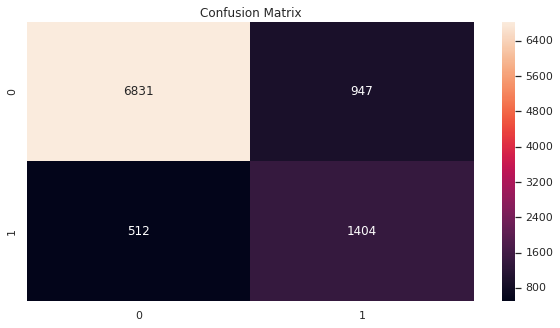

In [70]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_tree_train, y_tree_train)
y_pred7 = xgb_clf.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred7)

### **4.3 Hyperparameter Optimization**

Optimizing the parameters for RandomForest and Xgboost.

In [71]:
# Implementing GridSearchCV with RandomForest

n_estimators = [100, 500, 750, 1000]
max_depth = [8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf_clf, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_tree_train, y_tree_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 59.5min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 113.4min finished


In [72]:
bestF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.8501134722508769
Precision Score: 0.7388297872340426
Recall Score: 0.5908124202467036
F1-Score: 0.6565823682344599


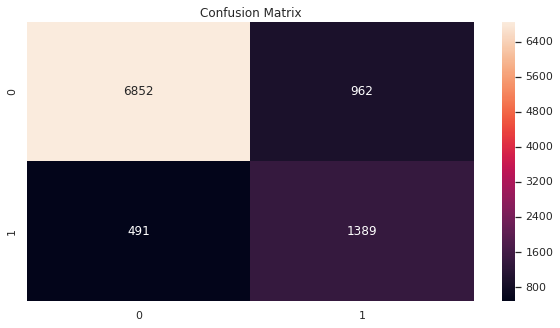

In [73]:
y_pred8 = bestF.predict(X_tree_test)
fcnPrintErrorMetrics(y_tree_test, y_pred8)

In [81]:
# RF with optimized parameters
rf_opt = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.8488755931504023
Precision Score: 0.7358892438764644
Recall Score: 0.5878349638451723
F1-Score: 0.6535824071884606


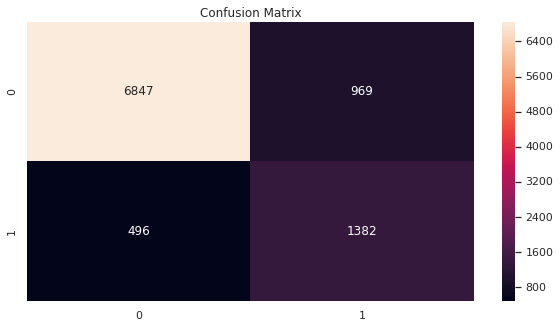

In [84]:
rf_opt.fit(X_tree_train, y_tree_train)
y_pred9 = rf_opt.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred9)

In [75]:
# Randomized search for tuning xgboost hyperparameters
def find_best_model(X, y):
    algos = {
        'xgboost': {
            'model': XGBClassifier(),
            'params': {
                'n_estimators' : [100, 200, 500],
                'learning_rate'    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                'reg_alpha' : [0.005, 0.01, 0.05],
                'gamma' : [i/10.0 for i in range(0,5)],
                'min_child_weight' : [6,8,10,12],
                'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
                'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
            }
        }
    }  
    scores = []
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    for algo_name, config in algos.items():
        gs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

model_scores = find_best_model(X_tree_train, y_tree_train)
model_scores

,model,best_score,best_params
0,xgboost,0.847505,"{'reg_alpha': 0.005, 'n_estimators': 100, 'min..."


In [76]:
model_scores[ "best_params"][0]

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 10,
 'n_estimators': 100,
 'reg_alpha': 0.005}

Accuracy: 0.8485661233752837
Precision Score: 0.732490784623486
Recall Score: 0.5916631220757125
F1-Score: 0.6545882352941177


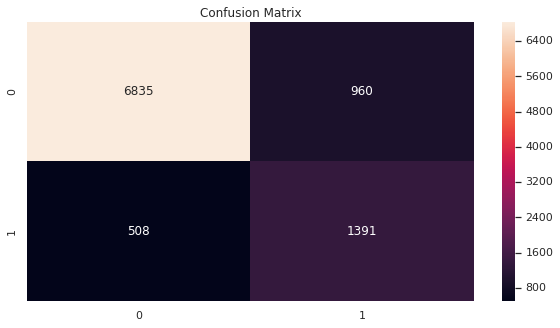

In [77]:
xgb_clf = XGBClassifier(colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=100, reg_alpha=0.005)
xgb_clf.fit(X_tree_train, y_tree_train)
y_pred9 = xgb_clf.predict(X_tree_test)

fcnPrintErrorMetrics(y_tree_test, y_pred9)

In [78]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

In [89]:
# Using VotingClassifier to increase accuracy
eclf1 = VotingClassifier(estimators=[('rf', rf_opt), ('xg', xgb_clf), ('lr', log_reg)], voting='hard')
eclf1 = eclf1.fit(X_tree_train, y_tree_train)

Accuracy: 0.849700845884052
Precision Score: 0.7400644468313641
Recall Score: 0.5861335601871545
F1-Score: 0.6541656776643723


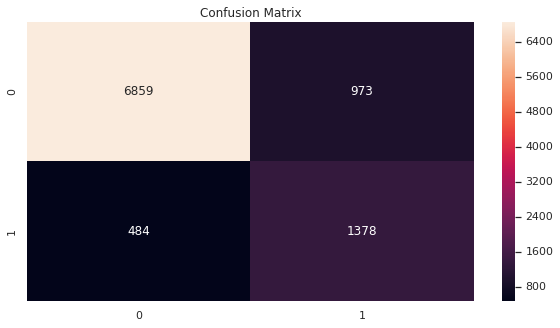

In [90]:
y_pred11 = eclf1.predict(X_tree_test)
fcnPrintErrorMetrics(y_tree_test, y_pred11)

Accuracy: 0.848772436558696
Precision Score: 0.7340031729243787
Recall Score: 0.5903870693321991
F1-Score: 0.6544082979726545


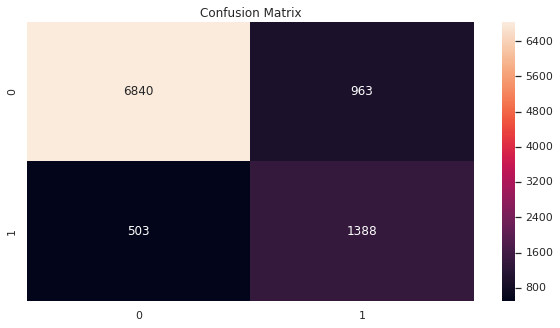

In [92]:
estimators = [('rf', rf_opt), ('xg', xgb_clf)]
sclf = StackingClassifier(estimators=estimators, final_estimator=SVC())
sclf.fit(X_tree_train, y_tree_train)
y_pred12 = sclf.predict(X_tree_test)
fcnPrintErrorMetrics(y_tree_test, y_pred12)

##### Finally, we can select the VotingClassifier consisting of RF and XGB to be the final model. 

### **4.4 Saving the Model**

Saving the model in a pickle file.

In [93]:
import pickle
import json

In [94]:
with open('donors_prediction.pickle','wb') as f:
    pickle.dump(eclf1, f)

In [98]:
cat_feature_columns = {
    "workclass" : [col for col in le1.classes_], 
    "education" : education_encoding,
    "occupation" : [col for col in le2.classes_],
    "marital_status" : [col for col in le3.classes_], 
    "relationship" : [col for col in le4.classes_], 
    "race" : [col for col in le5.classes_], 
    "gender" : [col for col in le6.classes_],
    "native_country" : [col for col in le7.classes_],
    "income" : [col for col in le8.classes_],
    "columns" : [col for col in X_tree.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(cat_feature_columns))

## **Conclusion**

We were able to get the following results using Voting Classifier based on Random Forest and Xgboost.

Accuracy: 0.849700845884052
Precision Score: 0.7400644468313641
Recall Score: 0.5861335601871545
F1-Score: 0.6541656776643723